### IMPORTING MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### READING DATA

In [2]:
df =  pd.read_excel('Transport_data.xlsx')
df.columns

Index(['Vehicle', 'Age', 'Mileage', 'Fuel Efficiency', 'Price',
       'Recommended buy'],
      dtype='object')

### CHECKING NULL VALUES

In [3]:
df.isnull().sum()

Vehicle            0
Age                1
Mileage            0
Fuel Efficiency    1
Price              0
Recommended buy    1
dtype: int64

**We can fill the null values using linear regression imputation for the Attributes "Age" And "Fuel Efficiency"**

In [4]:
df1 = df.drop(['Vehicle', 'Recommended buy'], axis=1)
missing_cols = df1.columns[df1.isnull().any()]
complete_cols = df1.columns.difference(missing_cols)
for col in missing_cols:
    complete_rows = df1.dropna(subset=[col])
    incomplete_rows = df1[df1[col].isnull()]
    X_train = complete_rows[complete_cols]
    y_train = complete_rows[col]
    X_test = incomplete_rows[complete_cols]
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    df1.loc[df1[col].isnull(), col] = predicted_values

df.drop(['Age', 'Mileage', 'Fuel Efficiency', 'Price'], axis=1, inplace=True)

df1

,Age,Mileage,Fuel Efficiency,Price
0,3.000000,30000,15.000000,15000
1,5.000000,50000,10.580769,12000
2,1.000000,10000,20.000000,20000
3,7.000000,70000,10.000000,10000
4,4.672285,40000,8.000000,25000
5,3.000000,20000,10.000000,30000
6,6.000000,60000,5.000000,20000
7,8.000000,40000,4.000000,15000


In [5]:
df2  =pd.concat([df,df1],axis=1)
df2
df = df2.copy()

### NOW WE WILL PREDICT THE MISSING  VALUE IN "Recommended buy"	COLUMN USING K- NEAREST NEIGHBOUR

In [6]:
numeric_cols = ['Age', 'Mileage', 'Fuel Efficiency', 'Price']
imputer = KNNImputer(n_neighbors=3)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
df['Recommended buy'] = df['Recommended buy'].fillna(
df['Recommended buy'].mode()[0])
print(df)

  Vehicle Recommended buy       Age  Mileage  Fuel Efficiency    Price
0   Car A             Yes  3.000000  30000.0        15.000000  15000.0
1   Car B              No  5.000000  50000.0        10.580769  12000.0
2   Car C             Yes  1.000000  10000.0        20.000000  20000.0
3   Car D              No  7.000000  70000.0        10.000000  10000.0
4   Car E              No  4.672285  40000.0         8.000000  25000.0
5   Car F             Yes  3.000000  20000.0        10.000000  30000.0
6   Car G              No  6.000000  60000.0         5.000000  20000.0
7   Car H              No  8.000000  40000.0         4.000000  15000.0


### Outlier Analysis

#### Using Box-Plot Method

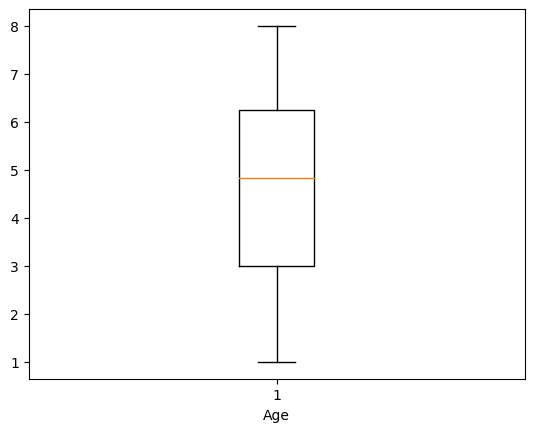

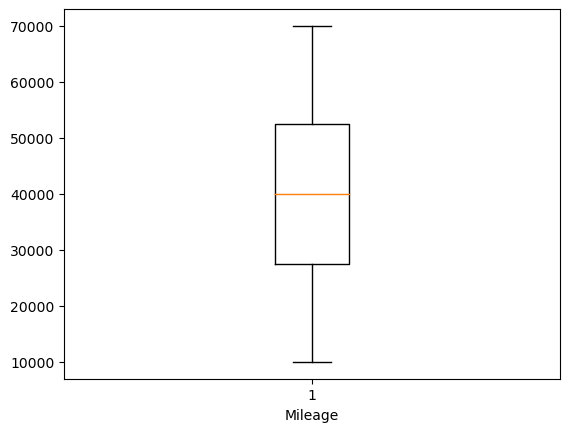

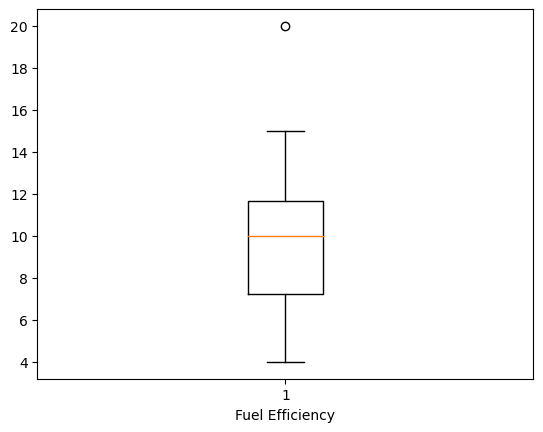

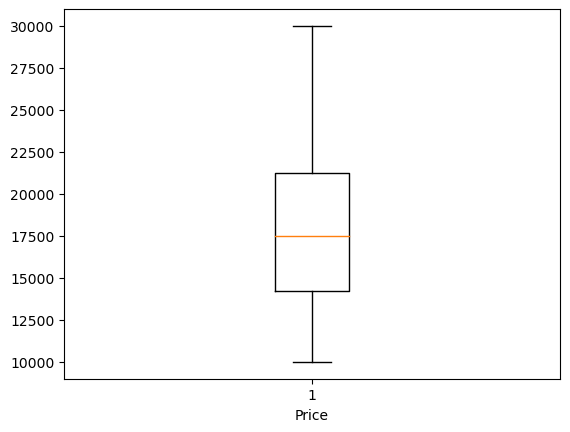

In [7]:
for i in numeric_cols:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

#### Using IQR method 

In [8]:
numeric_cols = ['Age', 'Mileage', 'Fuel Efficiency', 'Price']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[((df[numeric_cols] < lower_bound) | (
    df[numeric_cols] > upper_bound)).any(axis=1)]

print("Outliers:")
print(outliers)

Outliers:
  Vehicle Recommended buy  Age  Mileage  Fuel Efficiency    Price
2   Car C             Yes  1.0  10000.0             20.0  20000.0


#### Using DBSCAN Method

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

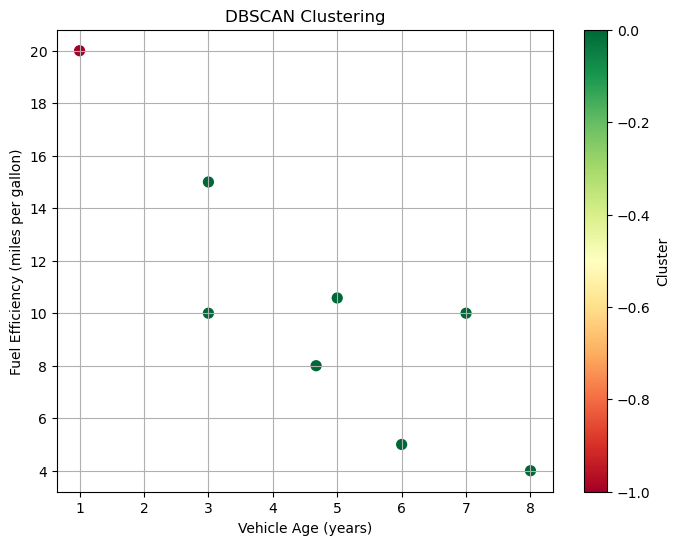

In [15]:
age_fuel_efficiency = df[['Age','Fuel Efficiency']].values
min_points = 5
epsilon = 5.57
# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
clusters = dbscan.fit_predict(age_fuel_efficiency)
plt.figure(figsize=(8, 6))
plt.scatter(age_fuel_efficiency[:, 0], age_fuel_efficiency[:, 1], c=clusters, cmap='RdYlGn', s=50)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Fuel Efficiency (miles per gallon)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Feature Selection

#### Using Pearson Correlation Coefficient

In [18]:
features = ['Age', 'Mileage', 'Fuel Efficiency',"Price"]
correlation_matrix = df[features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      Age   Mileage  Fuel Efficiency     Price
Age              1.000000  0.803126        -0.850069 -0.462247
Mileage          0.803126  1.000000        -0.609792 -0.561783
Fuel Efficiency -0.850069 -0.609792         1.000000 -0.022215
Price           -0.462247 -0.561783        -0.022215  1.000000


#### Using Forward Feature Selection

In [11]:
import pandas as pd
X = df[['Age', 'Mileage', 'Fuel Efficiency']]  
y = df['Price']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
all_scores = {}
for i in range(1, len(X.columns)+1):
    for combo in combinations(X.columns, i):
        model = LinearRegression()
        model.fit(X_train[list(combo)], y_train)
        score = model.score(X_test[list(combo)], y_test)
        all_scores[combo] = score
        print(
            f"Iteration {len(all_scores)}: Features {combo}, R-squared: {score:.4f}")
best_features = max(all_scores, key=all_scores.get)
best_score = all_scores[best_features]
print("\nBest Features:")
print(best_features)
print(f"Best R-squared: {best_score:.4f}")

Iteration 1: Features ('Age',), R-squared: 0.0784
Iteration 2: Features ('Mileage',), R-squared: 0.2017
Iteration 3: Features ('Fuel Efficiency',), R-squared: -0.1512
Iteration 4: Features ('Age', 'Mileage'), R-squared: 0.1731
Iteration 5: Features ('Age', 'Fuel Efficiency'), R-squared: 0.7650
Iteration 6: Features ('Mileage', 'Fuel Efficiency'), R-squared: 0.4865
Iteration 7: Features ('Age', 'Mileage', 'Fuel Efficiency'), R-squared: 0.7882

Best Features:
('Age', 'Mileage', 'Fuel Efficiency')
Best R-squared: 0.7882


### Dimensionality Reduction

#### Using Singular Value Decomposition

In [14]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Fuel Efficiency']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
svd = TruncatedSVD(n_components=2) 
X_svd = svd.fit_transform(X_scaled)
df_svd = pd.DataFrame(data=X_svd, columns=['Component 1', 'Component 2'])
df_final_svd = pd.concat([df, df_svd], axis=1)
print("Original DataFrame:")
print(df[features].head())
print("\nDataFrame after SVD:")
print(df_final_svd[['Component 1', 'Component 2']].head())

Original DataFrame:
        Age  Fuel Efficiency
0  3.000000        15.000000
1  5.000000        10.580769
2  1.000000        20.000000
3  7.000000        10.000000
4  4.672285         8.000000

DataFrame after SVD:
   Component 1  Component 2
0     1.238245     0.120866
1    -0.057609     0.132626
2     2.618475     0.193483
3    -0.795792     0.702056
4    -0.325424    -0.349452
